<a href="https://colab.research.google.com/github/Okocha76/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp


## Load and clean the Data

In [2]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", header=None, names=column_headers, na_values="?")
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [3]:
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [5]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

In [6]:
rep = df[df['party']=='republican']
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dem = df[df['party']=='democrat']
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("'Aid to Contras' bill is supported by", round(100 * dem['aid-to-contras'].mean(),2), "% of Democrats and",round(100 * rep['aid-to-contras'].mean(),2),"% of Republicans.")

'Aid to Contras' bill is supported by 82.89 % of Democrats and 15.29 % of Republicans.


In [9]:
ttest_ind(rep['aid-to-contras'], dem['aid-to-contras'], equal_var = False, nan_policy='omit')

Ttest_indResult(statistic=-18.254856278479288, pvalue=2.2881206640097267e-52)

Conclusion: Due to p-value < 0.05 null hypothesis is rejected.

## Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

In [10]:
print("'Physician Fee Freeze' bill is supported by", round(100 * dem['physician-fee-freeze'].mean(),2), "% of Democrats and",round(100 * rep['physician-fee-freeze'].mean(),2),"% of Republicans.")

'Physician Fee Freeze' bill is supported by 5.41 % of Democrats and 98.79 % of Republicans.


In [11]:
ttest_ind(rep['physician-fee-freeze'], dem['physician-fee-freeze'], equal_var = False, nan_policy='omit')

Ttest_indResult(statistic=56.70480591963001, pvalue=8.82076091455592e-193)

Conclusion: Due to p-value < 0.05 null hypothesis is rejected.

## Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [12]:
print("'Water Project' bill is supported by", round(100 * dem['water-project'].mean(),2), "% of Democrats and",round(100 * rep['water-project'].mean(),2),"% of Republicans.")

'Water Project' bill is supported by 50.21 % of Democrats and 50.68 % of Republicans.


In [13]:
ttest_ind(rep['water-project'], dem['water-project'], equal_var = False, nan_policy='omit')

Ttest_indResult(statistic=0.08893998898558053, pvalue=0.9291867875225105)

Conclusion: Due to p-value > 0.05 (and even > 0.1) null hypothesis is not rejected.

## Refactor your code into functions so it's easy to rerun with arbitrary variables

Ttest_indResult(statistic=-9.662336936353906, pvalue=5.429018745046274e-20) 
 Act: Handicapped-infants 
 Confidence interval: 99.0 % 
 Conclusion: Null hypothesis  REJECTED  

Ttest_indResult(statistic=0.08893998898558053, pvalue=0.9291867875225105) 
 Act: Water-project 
 Confidence interval: 99.0 % 
 Conclusion: Null hypothesis  NOT REJECTED  

Ttest_indResult(statistic=-22.79324627068853, pvalue=1.9467037396514675e-69) 
 Act: Budget 
 Confidence interval: 99.0 % 
 Conclusion: Null hypothesis  REJECTED  

Ttest_indResult(statistic=56.70480591963001, pvalue=8.82076091455592e-193) 
 Act: Physician-fee-freeze 
 Confidence interval: 99.0 % 
 Conclusion: Null hypothesis  REJECTED  

Ttest_indResult(statistic=23.907287619273422, pvalue=2.8983726123873854e-79) 
 Act: El-salvador-aid 
 Confidence interval: 99.0 % 
 Conclusion: Null hypothesis  REJECTED  

Ttest_indResult(statistic=10.767024944451316, pvalue=4.830931857697702e-24) 
 Act: Religious-groups 
 Confidence interval: 99.0 % 
 Conclus

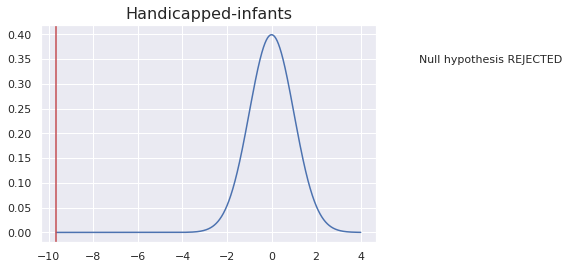

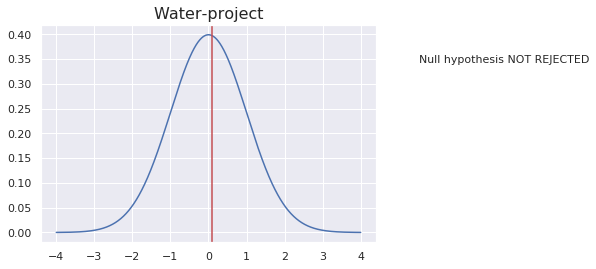

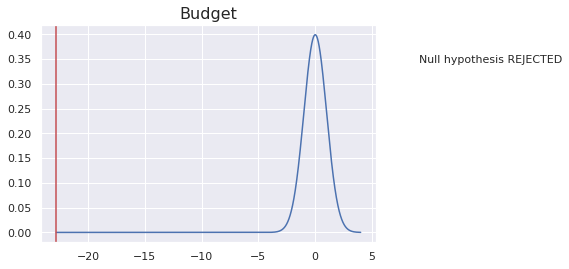

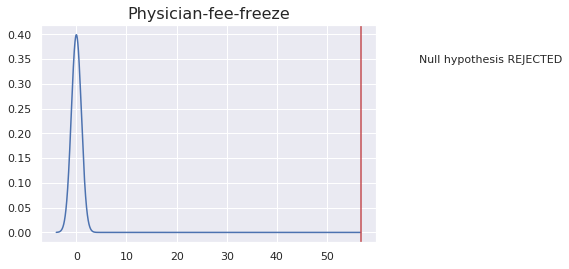

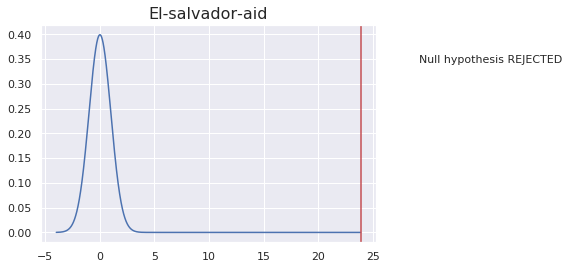

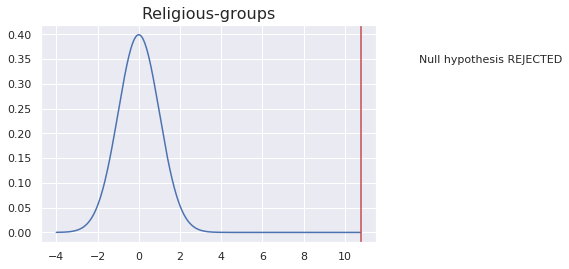

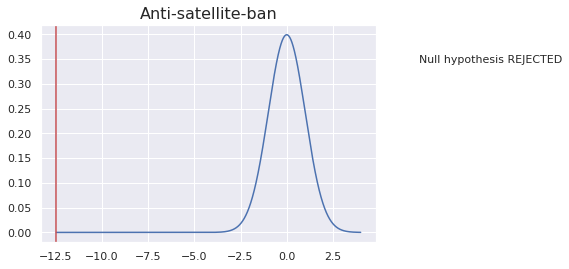

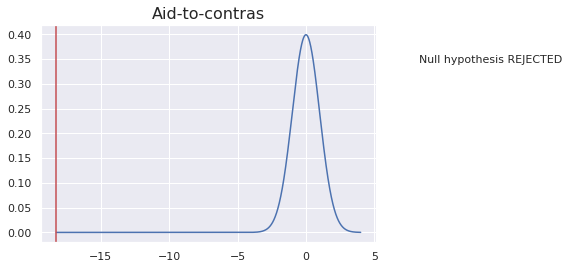

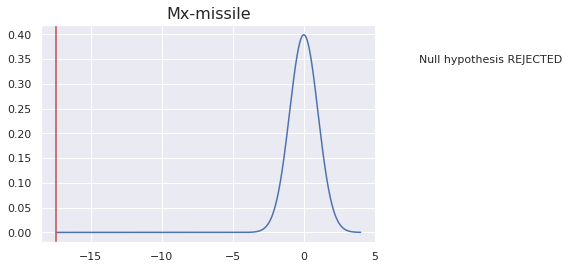

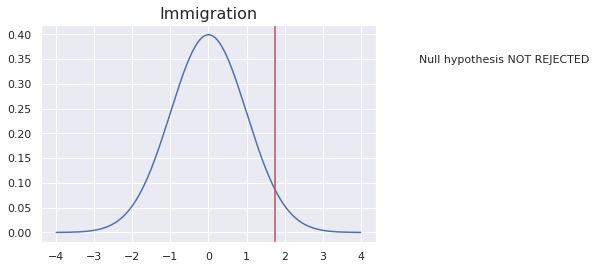

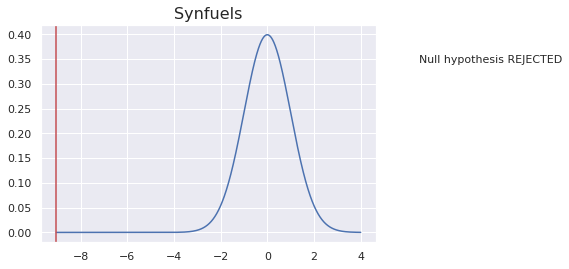

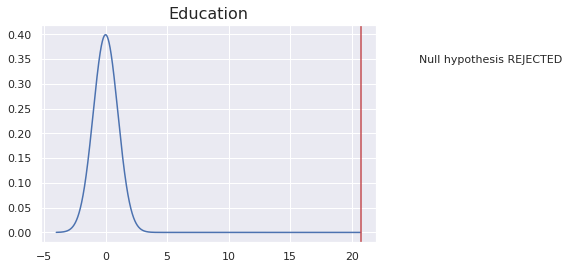

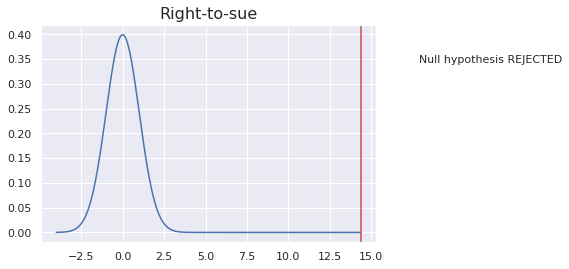

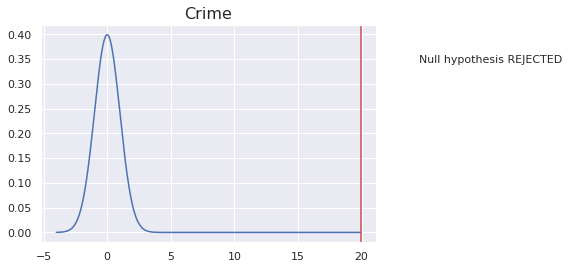

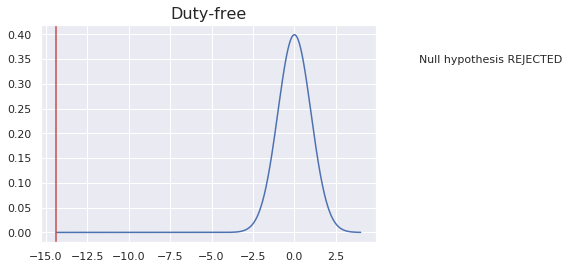

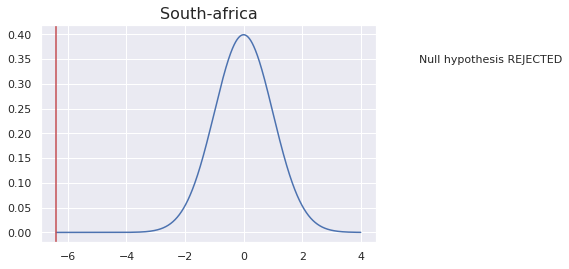

In [143]:
def ttest_congress(act, confidence=0.95):
  result = ttest_ind(rep[act], dem[act], equal_var = False, nan_policy='omit')
  
  fig, ax = plt.subplots()

  x_axis = np.arange(min(result[0],-4), max(result[0],4), 0.001)
  
  plt.plot(x_axis, st.norm.pdf(x_axis,0,1))
  plt.axvline(x=result[0], ymin=0, ymax=1, color='r')
  ax.set_title(act.capitalize(), fontsize=16)

  if result[1] < 1-confidence:
    fig.text(s='Null hypothesis REJECTED', y=.75, x=1, fontsize=11)
    return print(result, "\n Act:", act.capitalize(), 
             "\n Confidence interval:", 100*confidence, "%",    
             "\n Conclusion: Null hypothesis \033[1m REJECTED \033[0m \n")
    
  else:
    fig.text(s='Null hypothesis NOT REJECTED', y=.75, x=1, fontsize=11)
    return print(result, "\n Act:", act.capitalize(), 
             "\n Confidence interval:", 100*confidence, "%",    
             "\n Conclusion: Null hypothesis \033[1m NOT REJECTED \033[0m \n")
    
  fig.show()
   
acts = ['handicapped-infants','water-project', 'budget', 
           'physician-fee-freeze', 'el-salvador-aid',
           'religious-groups','anti-satellite-ban', 'aid-to-contras',
           'mx-missile','immigration', 'synfuels', 'education', 
           'right-to-sue','crime','duty-free', 'south-africa']    

for act in acts:
    ttest_congress(act, 0.99)

## Apply hypothesis testing to your personal project data 
(for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# I don't have any personal project data yet. Perhaps I will come back to this stretch goal later.